In [2]:
# Standard imports
import numpy as np
import pandas as pd

#
import random

# To interact with the operating system
import os

# For statistical modeling
import scipy.stats as stats

# To acquire MYSQL Data
import acquire
from env import username, password, host
import wrangle

# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# For running modeling
from sklearn.model_selection import train_test_split
import sklearn.metrics as mtc
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

# Exercises
## Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

#### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.
#### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?
#### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.
#### 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?
#### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

**Notes**:<br>
a scaler is a numpy array

---

In [3]:
# Grab zillow data from my .csv and remove added column
train = pd.read_csv('sfh_zillow_train.csv', index_col=0)
train.head(3)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1297002,4.0,3.0,2441.0,174459.0,2006.0,3091.32,6037.0
2422146,4.0,2.0,1248.0,236075.0,1924.0,2889.13,6037.0
2656567,3.0,2.0,1650.0,124327.0,1977.0,1545.91,6037.0


In [4]:
# Check the shape
train.shape

(1114251, 7)

In [5]:
train = wrangle.wrangle_7(train)

         bedroomcnt  bathroomcnt  calculatedfinishedsquarefeet  \
1297002         4.0          3.0                        2441.0   
2422146         4.0          2.0                        1248.0   
2656567         3.0          2.0                        1650.0   
2177611         3.0          2.0                        1601.0   
1108712         2.0          1.0                        1100.0   
...             ...          ...                           ...   
2138425         3.0          2.0                        1438.0   
188836          4.0          2.0                        1755.0   
1787453         3.0          2.5                        1535.0   
2038665         4.0          3.0                        2150.0   
1947274         4.0          2.0                        1377.0   

         taxvaluedollarcnt  yearbuilt  taxamount    fips  
1297002           174459.0     2006.0    3091.32  6037.0  
2422146           236075.0     1924.0    2889.13  6037.0  
2656567           124327.0    

In [6]:
# Check to see if the function worked
train.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
dtype: int64

### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.

In [7]:
train = train.rename(columns={'bedroomcnt': 'bedrooms', 'bathroomcnt': 'bathrooms', 
                      'calculatedfinishedsquarefeet': 'f_sqft', 'taxvaluedollarcnt': 'tax_value'})
train.head(3)

,bedrooms,bathrooms,f_sqft,tax_value,yearbuilt,taxamount,fips
1297002,4.0,3.0,2441.0,174459.0,2006.0,3091.32,6037.0
2422146,4.0,2.0,1248.0,236075.0,1924.0,2889.13,6037.0
2656567,3.0,2.0,1650.0,124327.0,1977.0,1545.91,6037.0


In [8]:
train_scaled = train.copy()
train_scaled.head(3)

,bedrooms,bathrooms,f_sqft,tax_value,yearbuilt,taxamount,fips
1297002,4.0,3.0,2441.0,174459.0,2006.0,3091.32,6037.0
2422146,4.0,2.0,1248.0,236075.0,1924.0,2889.13,6037.0
2656567,3.0,2.0,1650.0,124327.0,1977.0,1545.91,6037.0


In [9]:
# make the object, put it into the scaler
scaler = MinMaxScaler()
# make, fit, use:
columns = ['bedrooms', 'bathrooms','tax_value', 'f_sqft']
# fit the object:
train_scaled[columns] = scaler.fit_transform(train[columns])

In [10]:
#print(train.copy)
#print(train_scaled)

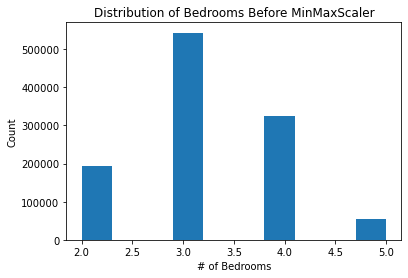

In [11]:
plt.hist(train.bedrooms)
plt.title('Distribution of Bedrooms Before MinMaxScaler')
plt.xlabel('# of Bedrooms')
plt.ylabel('Count')
plt.show()

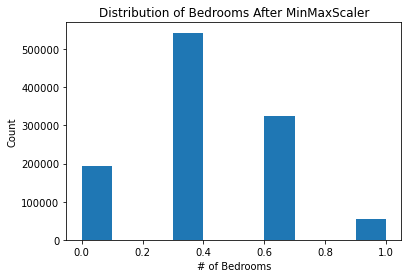

In [12]:
plt.hist(train_scaled.bedrooms)
plt.title('Distribution of Bedrooms After MinMaxScaler')
plt.xlabel('# of Bedrooms')
plt.ylabel('Count')
plt.show()

In [13]:
def visualize_scaler(scaler, df, columns_to_scale, bins=10):
    fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(16,9))
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col.capitalize()} before scaling',
                xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col.capitalize()} after scaling with {scaler.__class__.__name__}',
                xlabel=col, ylabel='count')
    plt.tight_layout()
    #return fig, axs

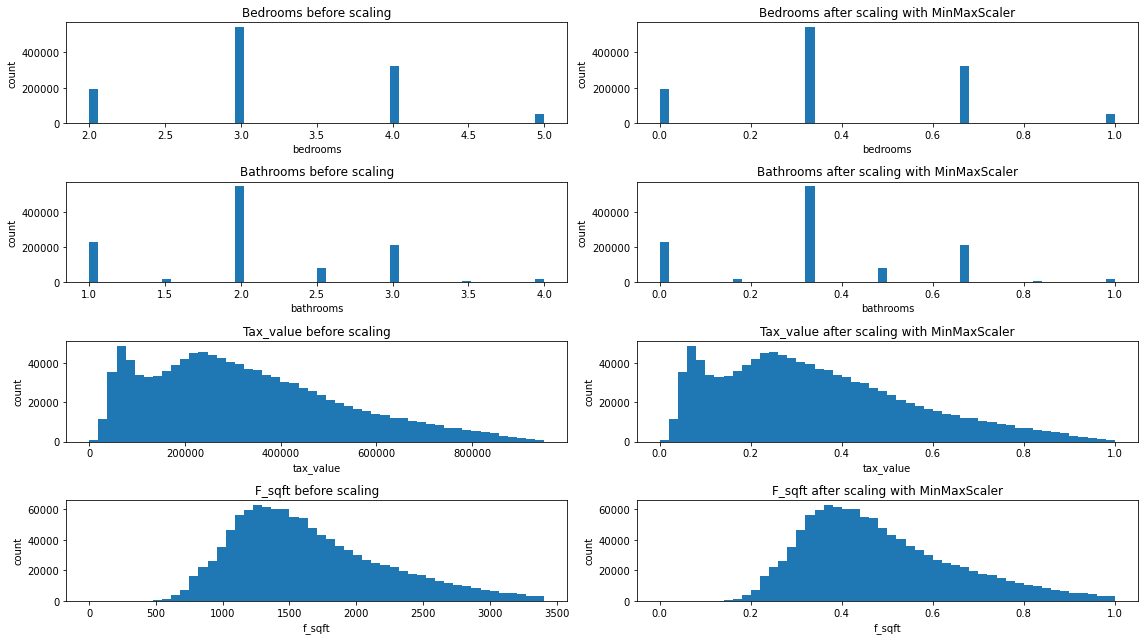

In [14]:
# MinMaxScaler Applied
visualize_scaler(scaler=MinMaxScaler(), 
                 df=train,
                 columns_to_scale=columns, 
                 bins=50)

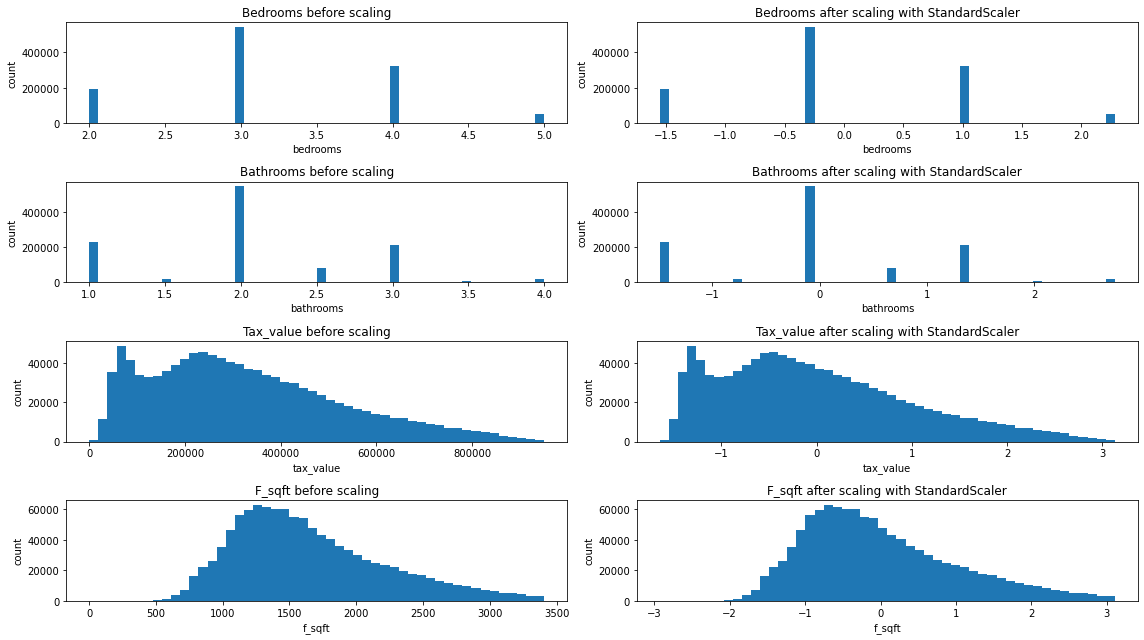

In [15]:
# Standard Scaler
visualize_scaler(scaler=StandardScaler(), 
                 df=train, 
                 columns_to_scale=columns, 
                 bins=50)

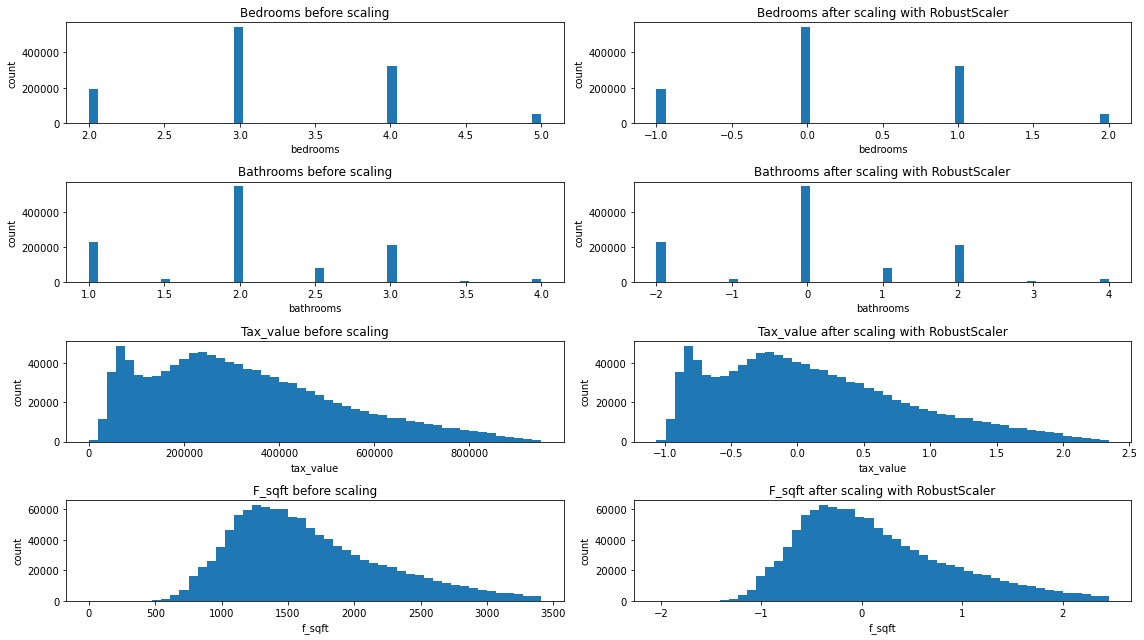

In [17]:
# RobustScaler
visualize_scaler(scaler=RobustScaler(), 
                 df=train,
                 columns_to_scale=columns,
                 bins=50)

---

### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [18]:
scaler = MinMaxScaler()
s_train = scaler.fit_transform(train)

In [19]:
s_train

array([[0.66666667, 0.66666667, 0.71617259, ..., 0.95348837, 0.29676141,
        0.        ],
       [0.66666667, 0.33333333, 0.36601115, ..., 0.57209302, 0.2772236 ,
        0.        ],
       [0.33333333, 0.33333333, 0.48400352, ..., 0.81860465, 0.14742696,
        0.        ],
       ...,
       [0.33333333, 0.5       , 0.45024949, ..., 0.85581395, 0.2883294 ,
        0.2972973 ],
       [0.66666667, 0.66666667, 0.6307602 , ..., 0.75348837, 0.37997033,
        0.2972973 ],
       [0.66666667, 0.33333333, 0.40387438, ..., 0.71627907, 0.61826808,
        0.        ]])

In [20]:
len(s_train)

1114251

In [23]:
bed_train = train[['bedrooms']]
s_train = scaler.fit_transform(bed_train)

In [24]:
bed_train

,bedrooms
1297002,4.0
2422146,4.0
2656567,3.0
2177611,3.0
1108712,2.0
...,...
2138425,3.0
188836,4.0
1787453,3.0
2038665,4.0


In [25]:
s_train

array([[0.66666667],
       [0.66666667],
       [0.33333333],
       ...,
       [0.33333333],
       [0.66666667],
       [0.66666667]])

In [26]:
scaler.inverse_transform(s_train)

array([[4.],
       [4.],
       [3.],
       ...,
       [3.],
       [4.],
       [4.]])

---

### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

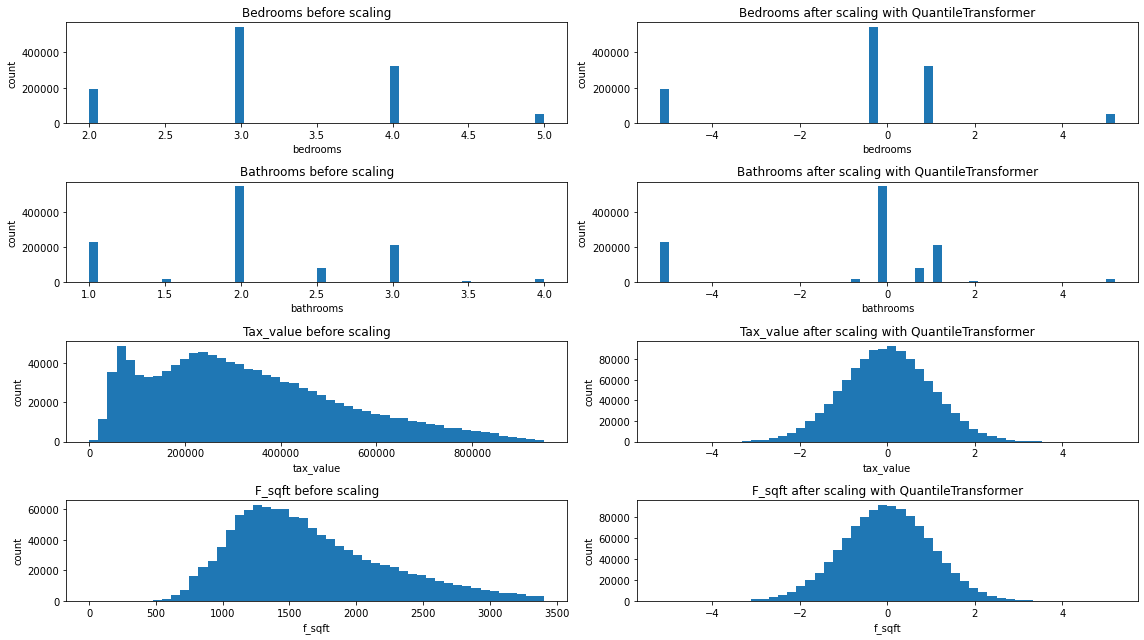

In [28]:
# QuantileTransformer
visualize_scaler(scaler=QuantileTransformer(output_distribution='normal'),
                 df=train,
                 columns_to_scale=columns,
                 bins=50)

---

### 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

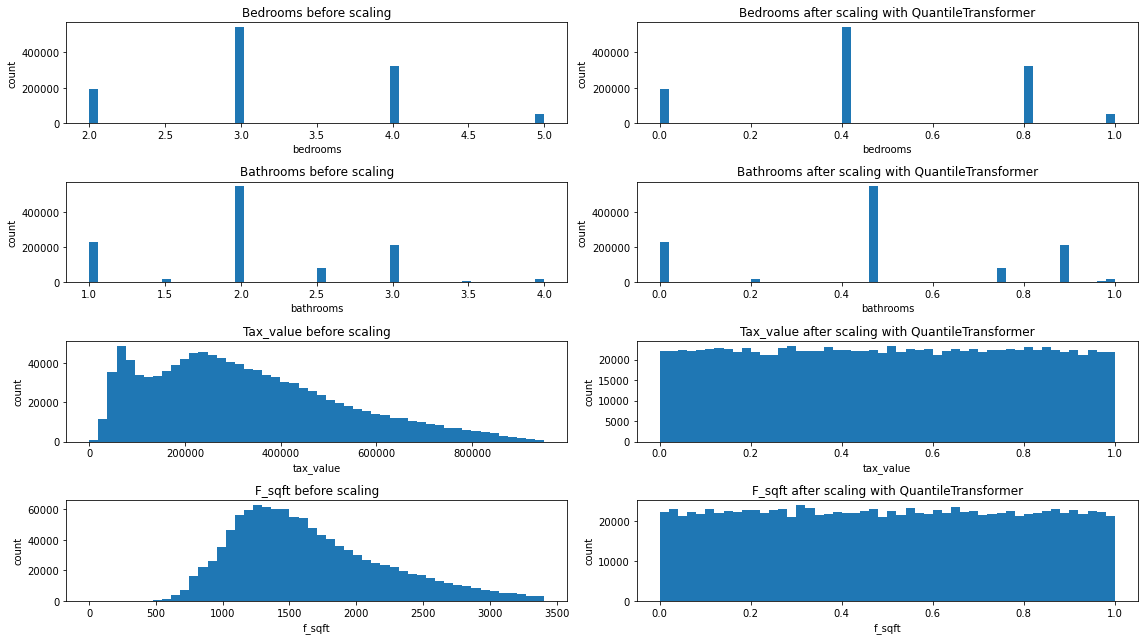

In [29]:
# QuantileTransformer
visualize_scaler(scaler=QuantileTransformer(),
                 df=train,
                 columns_to_scale=columns,
                 bins=50)

---

### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [57]:
train

,bedrooms,bathrooms,f_sqft,tax_value,yearbuilt,taxamount,fips
1297002,4.0,3.0,2441.0,174459.0,2006.0,3091.32,6037.0
2422146,4.0,2.0,1248.0,236075.0,1924.0,2889.13,6037.0
2656567,3.0,2.0,1650.0,124327.0,1977.0,1545.91,6037.0
2177611,3.0,2.0,1601.0,342169.0,1988.0,3885.90,6111.0
1108712,2.0,1.0,1100.0,171958.0,1929.0,2139.12,6037.0
...,...,...,...,...,...,...,...
2138425,3.0,2.0,1438.0,112178.0,1928.0,1432.14,6037.0
188836,4.0,2.0,1755.0,409850.0,1952.0,4963.23,6037.0
1787453,3.0,2.5,1535.0,284721.0,1985.0,3004.06,6059.0
2038665,4.0,3.0,2150.0,347082.0,1963.0,3952.42,6059.0


In [63]:
def scale_data(train, 
               validate, 
               test, 
               columns=['bedrooms', 'bathrooms', 'tax_value', 'f_sqft', 'taxamount'],
               return_scaler=False):
    '''
    Scales train, validate, test and returns scaled versions of each 
    If return_scalar is True, the scaler object will be returned as well
    '''
    # make copies
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    # Make the scaler
    scaler = MinMaxScaler()
    # Fit it
    scaler.fit(train[columns])
    # Apply the scaler:
    train_scaled[columns] = pd.DataFrame(scaler.transform(train[columns]),
                                                  columns=train[columns].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns] = pd.DataFrame(scaler.transform(validate[columns]),
                                                  columns=validate[columns].columns.values).set_index([validate.index.values])
    
    test_scaled[columns] = pd.DataFrame(scaler.transform(test[columns]),
                                                 columns=test[columns].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled

In [64]:
scaler, train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, return_scaler=True)

In [65]:
train_scaled

,bedrooms,bathrooms,f_sqft,tax_value,yearbuilt,taxamount,fips
1297002,0.666667,0.666667,0.716173,0.183459,2006.0,0.296761,6037.0
2422146,0.666667,0.333333,0.366011,0.248254,1924.0,0.277224,6037.0
2656567,0.333333,0.333333,0.484004,0.130740,1977.0,0.147427,6037.0
2177611,0.333333,0.333333,0.469621,0.359821,1988.0,0.373542,6111.0
1108712,0.000000,0.000000,0.322571,0.180829,1929.0,0.204749,6037.0
...,...,...,...,...,...,...,...
2138425,0.333333,0.333333,0.421779,0.117964,1928.0,0.136433,6037.0
188836,0.666667,0.333333,0.514822,0.430994,1952.0,0.477646,6037.0
1787453,0.333333,0.500000,0.450249,0.299409,1985.0,0.288329,6059.0
2038665,0.666667,0.666667,0.630760,0.364988,1963.0,0.379970,6059.0


In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1114251 entries, 1297002 to 1947274
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   bedrooms   1114251 non-null  float64
 1   bathrooms  1114251 non-null  float64
 2   f_sqft     1114251 non-null  float64
 3   tax_value  1114251 non-null  float64
 4   yearbuilt  1114251 non-null  float64
 5   taxamount  1114251 non-null  float64
 6   fips       1114251 non-null  float64
dtypes: float64(7)
memory usage: 68.0 MB


---
---

### Zillow continued:

#### As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

##### 1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

##### 2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

##### 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

##### 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

##### 5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

##### 6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

##### 7. Come up with some initial hypotheses based on your goal of predicting property value.

##### 8. Visualize all combinations of variables in some way.

##### 9. Run the appropriate statistical tests where needed.

##### 10. What independent variables are correlated with the dependent variable, home value?

##### 11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

##### 12. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

##### 13. Explore your dataset with any other visualizations you think will be helpful.

Bonus Exercise
In a seperate notebook called explore_mall, use the functions you have developed in this exercise with the mall_customers dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make spending_score your target variable.

In [73]:
train = pd.read_csv('sfh_zillow_train.csv', index_col=0)
train.head(3)

,bedrooms,bathrooms,f_sqft,tax_value,yearbuilt,taxamount,fips
1297002,4.0,3.0,2441.0,174459.0,2006.0,3091.32,6037.0
2422146,4.0,2.0,1248.0,236075.0,1924.0,2889.13,6037.0
2656567,3.0,2.0,1650.0,124327.0,1977.0,1545.91,6037.0


In [79]:
train.bathrooms.mean()

2.0531155009059896

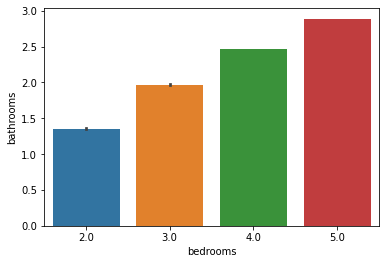

In [78]:
sns.barplot(train.bedrooms, train.bathrooms)
plt.show()

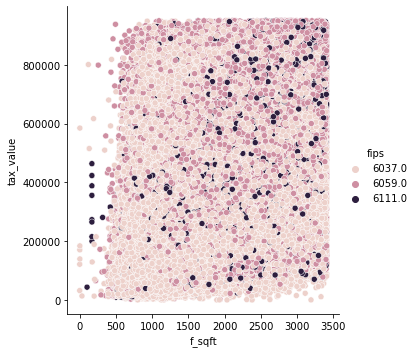

In [84]:
sns.relplot(train.f_sqft, train.tax_value, hue=train.fips)
#plt.ticklabel_format(style='plain', useOffset=False)
plt.show()

In [ ]:
plot_variable_pairs